## just having a look at the clustering measurements for testing 

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pickle as p
from pypower import PowerSpectrumMultipoles


In [13]:
path = '/global/cfs/cdirs/desicollab/users/alexpzfz/KP4/fiducial_cosmo/CubicBox/Pk/ELG/AbacusSummit_base_c003_SV3/los_x/'
filename = 'Pk_ELG_snap16_multigrid_nmesh512_sm10_f0.888_b1.20_recsym_Grid000_ph000.npy'
#filename = 'Pk_ELG_snap16_Grid000_ph003.npy'

#dat = np.load(path+filename, allow_pickle=True)

#d = dat[()] # weird way to read in the files .... 

# for i in d:
    
#     print(i)

# print('----------')
# print(d['name']) # just 'multipole' 
# print(d['modes'][0].shape) # k modes 
# print(d['edges'][0])#.shape) # k bin edges 
# print(d['power_direct_nonorm'][0].shape) # array of zeros ????????????????
# print(d['power_nonorm'][0].shape) # actually a power spectrum? 
# print(d['power_zero_nonorm']) # 3 random numbers that are complex (idk y)
# print(d['sep_direct']) # actually just 'None'
# print(d['nmodes'].shape) # dont know 
# print(d['wnorm']) # single number 
# print(d['shotnoise_nonorm']) # single number 
# print(d['corr_direct_nonorm']) # actually None 
# print(d['ells'])
# print(d['attrs'])

# plt.subplots_adjust(wspace=0.5, hspace=0.5, right=2.0, left=0.0, bottom=-.5)
# plt.scatter(d['modes'][0][3:], np.real(d['power_nonorm'][0][3:]))# * d['modes'][0][3:]**2))



poles = PowerSpectrumMultipoles.load(path+filename)
print(dir(poles))
#print(poles.log_info())
poles.slice(slice(0, 800))
poles.rebin(5) # rebinning by a factor of 5 
k, pkell = poles(ell=(0,2,4), return_k=True, complex=False)

bools = np.logical_not(np.isnan(k))
k = k[bools]

pk0, pk2, pk4 = pkell

pk0 = pk0[bools]
pk2 = pk2[bools]
pk4 = pk4[bools]


#print(np.min(k), np.max(k), len(k))

#print(pkell2)
#print(k)


#print(k2)
#print(k2)
#print(abs(k2[1:] - k2[0:-1]))
#print(abs(k[1:] - k[0:-1]))

# print(dir(poles))
# print(poles.edges[0].shape) # just 'multipole' 
# print(poles.modes[0].shape) 
# print(poles.k.shape)
# print(poles.ells)
# print(poles(ell=(0,2,4), return_k=True, complex=False))

['__add__', '__call__', '__class__', '__copy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_attrs', '_coords_names', '_power_names', '_toaverage', '_tosum', 'attrs', 'average', 'concatenate_proj', 'copy', 'corr_direct_nonorm', 'deepcopy', 'edges', 'ells', 'from_state', 'get_power', 'k', 'kavg', 'kedges', 'load', 'log_critical', 'log_debug', 'log_error', 'log_info', 'log_warning', 'logger', 'modeavg', 'modes', 'name', 'ndim', 'nmodes', 'plot', 'power', 'power_direct_nonorm', 'power_nonorm', 'power_zero_nonorm', 'rebin', 'save', 'save_txt', 'select', 'sep_direct', 'set_power_direct', 'shape', 'shotnoise', 'shotnoise_nonorm', 'slice',

TypeError: Logger.info() missing 1 required positional argument: 'msg'

## looking at covariance matrices 

In [46]:
path = '/global/u2/c/crisjagq/HOD_tests/covariance_matrices/CovaPT/low_density/AnalyticCov_Gaussian_Pk_Abacus_CubicBox_hod_LNHOD.txt'
cov_input = pd.read_csv(path, comment="#", delim_whitespace=True, header=None).to_numpy()

print(cov_input.shape)

(480, 480)


## comparing to the other files we pickled for the ELG mocks 

In [70]:
loc = "/global/cfs/cdirs/desi/cosmosim/KP45/MC/Clustering/AbacusSummit/CubicBox/ELG/Pk/Pre/Cristhian/txt_rebinned/" # pre-recon 
loc2 = "/global/cfs/cdirs/desi/cosmosim/KP45/MC/Clustering/AbacusSummit/CubicBox/ELG/Pk/Post/Cristhian/recsym/txt_rebinned/" # post-recon
filename = "Pk_ELGlowDens_Abacus_c000_ph0" # pre-recon
filename2 = "Pk_ELGlowDens_recsym_Abacus_c000_ph0" # post-recon


mydata = open(loc2 + '/' + filename2 + "00" + '.txt', 'r') 
lines=mydata.readlines()
k  = []
P0 = []
P2 = []
P4 = []
for line in lines: # looping through lines in file to save k, monopole, quadrupole and hexadecapole 
    print(line)
    if line.startswith('#'):
        if line[4:17]=='galaxy_number':
            num_gal = float(line.split()[2])
            num_ran = num_gal * 20
            boxsize = 2000
            nbar_gal = num_gal/boxsize**3
            nbar_ran = num_ran/boxsize**3
            shot_noise_gal = 1/nbar_gal
            shot_noise_ran = 1/nbar_ran
            shot_noise = shot_noise_gal + shot_noise_ran
            print("num_gal:", num_gal, "nbar_gal:", nbar_gal, "Shot-Noise:", shot_noise)
    else:
        k.append(line.split()[1]) 
        P0.append(line.split()[3]) 
        P2.append(line.split()[4]) 
        P4.append(line.split()[5]) 
        mydata.close()
        
print(len(k))


# autocorr = True

# data_size1 = 23996301

# data_size2 = 23996301

# sum_data_weights1 = 23996301

# sum_data_weights2 = 23996301

# randoms_size1 = 0

# randoms_size2 = 0

# sum_randoms_weights1 = 0.000000000000e+00

# sum_randoms_weights2 = 0.000000000000e+00

# los_type = global

# los = [0.000000000000e+00 0.000000000000e+00 1.000000000000e+00]

# nmesh = [512 512 512]

# boxsize = [2.000000000000e+03 2.000000000000e+03 2.000000000000e+03]

# boxcenter = [1.000000001423e+03 1.000000001310e+03 1.000000001835e+03]

# resampler1 = tsc

# resampler2 = tsc

# interlacing1 = 2

# interlacing2 = 2

# shotnoise = 3.500539520654e+02

# wnorm = 7.197780771033e+04

# nmodes kmid               kavg               P0(k)              P1(k)              P2(k)               P3(k)              P4(k)

19       2.500000000000e-03 3.798113303144e-03 7.542145929318e+03 0.000000000000e+00 1.718171222892e+04  0.000000000000e+00 4.087224664767e+04

128      7.500000000000e-03 8.299341275452e-03 1.8104663

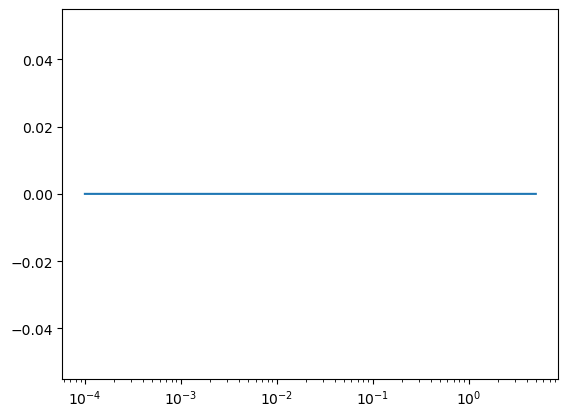

In [8]:
#import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#import pickle as p
#from pypower import PowerSpectrumMultipoles

pktemplate = np.loadtxt("DESI_Pk_template.dat").T
pktemplate2 = np.loadtxt("DESI_Pk_template_c003.dat").T

#plt.semilogx(pktemplate[0], (pktemplate[2]), label='cosmology 000')
#plt.semilogx(pktemplate2[0], (pktemplate2[2]), label='cosmology 003')

plt.semilogx(pktemplate[0], pktemplate[2] - pktemplate2[2])

plt.show()